## Manipulating Jupiter Images

<strong> Adam Benson </strong> <br>
<strong> 2/2/2018 </strong>

Juno is a NASA mission to Jupiter launches in 2011 that arrived at Jupiter on July 4th, 2016.

https://www.nasa.gov/mission_pages/juno/main/index.html

<strong> Goals: </strong> <br>
Plot multi-dimensional data.

Read in non CSV into a data format for analysis.

Manipulate PNG data.

Use and develop functions.

Index with non-Pandas data structures.

Use dictionaries, numpy ndarrays.

#### Import Statements

In [7]:
## Import Statemnets
#importing packages
import numpy as np               #for handling numbers w/ precision
import pandas as pd              #for handling dataframes
import matplotlib.pyplot as plt  #for plotting of datasets
import datetime as dt            #Importing the package datetime for 
                                 #datetime manipulation
import matplotlib.dates as mdt   #for manipulation of dates in matplotlib
import matplotlib.image as mpimg #NEW IN THIS LAB - for manipulation of img files
                                 #in plotting environments
import os                        #NEW IN THIS LAB - for interactive with files
    
#setting up Jupyter environment so plots will be placed in the notebook
%matplotlib inline

## POI: South Polar region
## Mission Phase: PERIJOVE 8

In [8]:
# South Polar Region Source:
# https://www.missionjuno.swri.edu/junocam/processing?id=2764 
# Image date: 
# 2017-09-01 22:34 UT

# Setting up filepath
southPoleDirectoryName = './SouthPoleImageSet/'
southPoleFileNames = os.listdir(southPoleDirectoryName)
print(southPoleFileNames, '\n')

southPoleImageData = dict() #creating dictionary to store image data

# x[26:-4]] = Slice of filename string with name of image
for x in southPoleFileNames:
    southPoleImageData[x[26:-4]] =  mpimg.imread(southPoleDirectoryName + x)

print(southPoleImageData.keys(), '\n')

['JNCE_2017244_08C00124_V01-green.png', 'JNCE_2017244_08C00124_V01-blue.png', 'JNCE_2017244_08C00124_V01-raw.png', 'JNCE_2017244_08C00124_V01-red.png', 'JNCE_2017244_08C00124_V01-mapprojected.png'] 

dict_keys(['green', 'blue', 'raw', 'red', 'mapprojected']) 



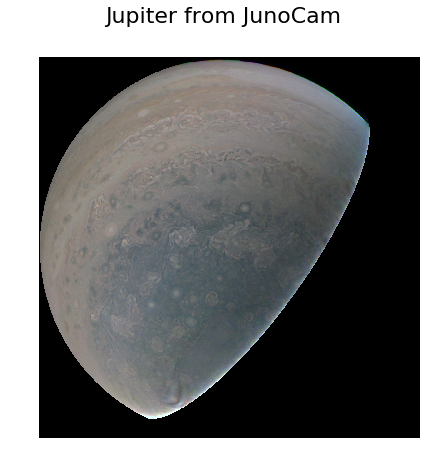

In [13]:
#### Displaying image ##########

f = plt.figure(figsize=(7,7))

plt.imshow(southPoleImageData['mapprojected'])


plt.suptitle("Jupiter from JunoCam", fontsize=22)
plt.axis('off')
plt.show()

In [24]:
#make a copy so we don't overrun our old dataset - setting equal will overrun our previous set
#https://docs.python.org/3/library/copy.html

southPoleImageData['mapprojectedAugment'] = southPoleImageData['mapprojected'].copy()


#change the greem panel to increase by 10%
#change the blue panel to increase by 40%
southPoleImageData['mapprojectedAugment'][:, :, 1]  =  southPoleImageData['mapprojectedAugment'][:, :, 1]*1.1
southPoleImageData['mapprojectedAugment'][:, :, 2]  =  southPoleImageData['mapprojectedAugment'][:, :, 2]*1.4

#while this doesn't matter with the 0 values, it will overshoot the one values

#this 'clips' numpy arrays and ndarrays between min and max, in this case, 0 and 1
southPoleImageData['mapprojectedAugment'][:, :, 1] = np.clip(southPoleImageData['mapprojectedAugment'][:, :, 1], 
                                                    0, 1)
southPoleImageData['mapprojectedAugment'][:, :, 2] = np.clip(southPoleImageData['mapprojectedAugment'][:, :, 2], 
                                                    0, 1)

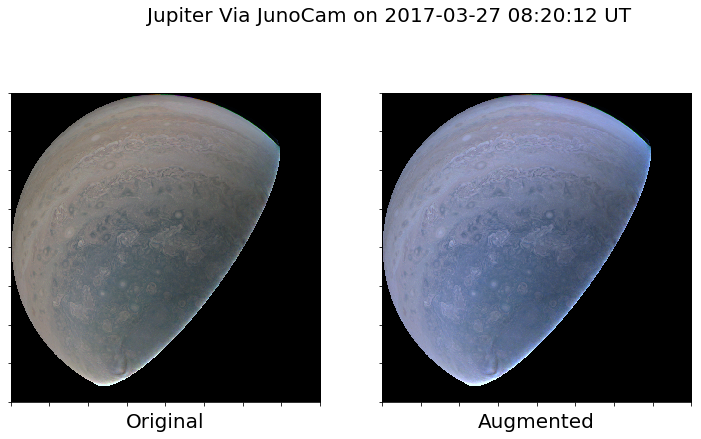

In [29]:
fig = plt.figure(figsize=(14, 7))
fig.suptitle('Jupiter Via JunoCam on 2017-03-27 08:20:12 UT', fontsize=20)

gs = plt.GridSpec(1, 2, hspace=0.1, wspace=0.2, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[:,1])

#make aspect ratio better - 1.0 is square. Feel free to play around with these
#and see how it streches.
ax1.set_aspect(1.0)
ax2.set_aspect(1.0)

#plot images data - note for now use imshow to plot out the 3D datasets
ax1.imshow(southPoleImageData['mapprojected'])
ax2.imshow(southPoleImageData['mapprojectedAugment'])


#setting labeling
ax1.set_xlabel('Original',   fontsize = 20)
ax2.set_xlabel('Augmented', fontsize = 20)

#setting tick parameters to null - these are just pixel values so in this case, not
#incredibly informative
ax1.set_xticklabels([]) #make the tick labels
ax2.set_xticklabels([])


ax1.set_yticklabels([]) #make the tick labels
ax2.set_yticklabels([])

plt.savefig("FinalPNGs/AugmentedImage.png")
plt.show()

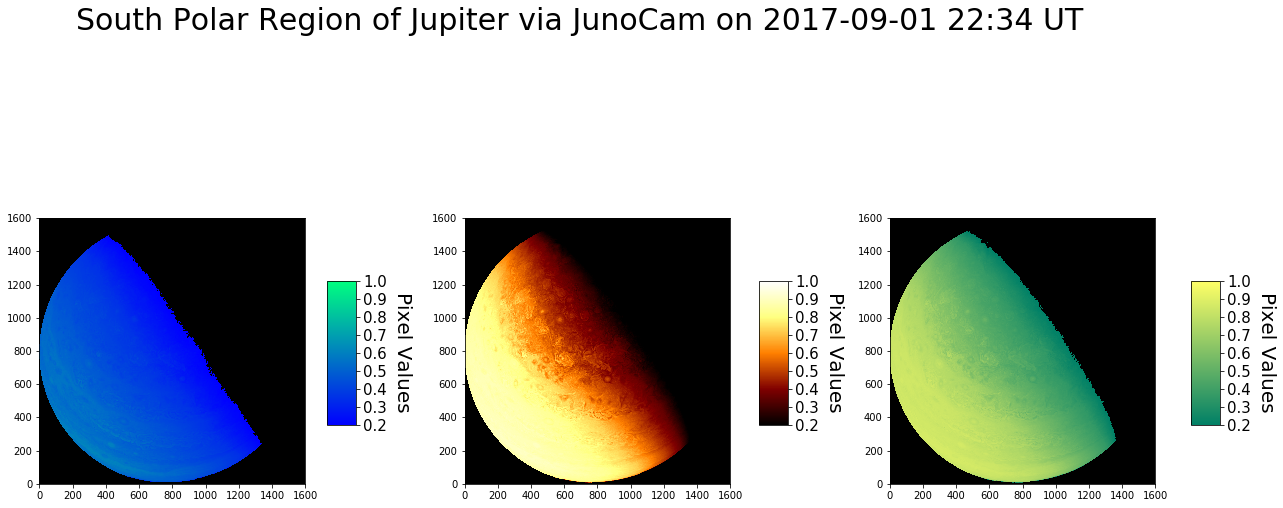

In [14]:
fig = plt.figure(figsize=(20, 10))

fig.suptitle('South Polar Region of Jupiter via JunoCam on 2017-09-01 22:34 UT', fontsize=30)

southMultiPlot = plt.GridSpec(1, 3, wspace=0.6)

blueChart = fig.add_subplot(southMultiPlot[:,0]) #Partitioning the first column of the grid to the blue chart
redChart = fig.add_subplot(southMultiPlot[:,1]) #Partitioning the second column of the grid to the red chart
greenChart = fig.add_subplot(southMultiPlot[:,2]) #Partitioning the second column of the grid to the green chart

#############################
#############################

blueChart.set_aspect(1)
redChart.set_aspect(1)
greenChart.set_aspect(1)

redChart = redChart.pcolormesh(southPoleImageData['red'],   cmap = 'afmhot', vmin = 0.2, vmax = 1.0 ) #Changed vmin and max so that it captures values 0.2-1.0
redChart.cmap.set_under('k') #Setting the background color to black

greenChart = greenChart.pcolormesh(southPoleImageData['green'], cmap = 'summer', vmin = 0.2, vmax = 1.0)
greenChart.cmap.set_under('k') 

blueChart = blueChart.pcolormesh(southPoleImageData['blue'],  cmap = 'winter', vmin = 0.2, vmax = 1.0)
blueChart.cmap.set_under('k')


############################# 
bluePosition = fig.add_axes([0.325, 0.4, 0.02, 0.2]) # Specifying the positions of the color bars.
redPosition = fig.add_axes([0.625, 0.4, 0.02, 0.2])
greenPosition = fig.add_axes([0.925, 0.4, 0.02, 0.2])
############################# 

blueColorBar = fig.colorbar(blueChart, cax = bluePosition) # Assigning colorbars to their positions
redColorBar = fig.colorbar(redChart, cax = redPosition)
greenColorBar = fig.colorbar(greenChart, cax = greenPosition)



blueColorBar.set_label('Pixel Values', labelpad=25,
                     rotation=270, fontsize=20)

redColorBar.set_label('Pixel Values', labelpad=25,
                     rotation=270, fontsize=20)

greenColorBar.set_label('Pixel Values', labelpad=25,
                     rotation=270, fontsize=20)


#changing size of ticks
blueColorBar.ax.tick_params(labelsize=15)
redColorBar.ax.tick_params(labelsize=15)
greenColorBar.ax.tick_params(labelsize=15)

plt.show()

## POI: North Pole
## Mission Phase: PERIJOVE 8

dict_keys(['red', 'green', 'mapprojected', 'blue', 'raw']) 



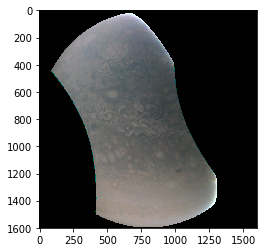

In [15]:
# North Pole Source:
# https://www.missionjuno.swri.edu/junocam/processing?id=2748
# Image date:
# 2017-09-01 21:29 UT
northPoleDirectoryName = './NorthPoleImageSet/'
northPoleFileNames = os.listdir(northPoleDirectoryName)

northPoleImageData = dict()

#print(northPoleFileNames, '\n')
# x[26:-4]] = Slice of filename string with name of image

#oing through directory of image files and adding the files to the dictionary
for x in northPoleFileNames:
    northPoleImageData[x[26:-4]] =  mpimg.imread(northPoleDirectoryName + x)   

print(northPoleImageData.keys(), '\n')

plt.imshow(northPoleImageData['mapprojected'])

plt.show()

## Manipulation of Image

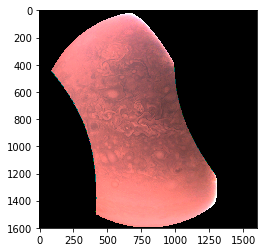

In [21]:
# Making a copy so I do not overwrite the original data.
northPoleImageData['mapprojectedAugment'] = northPoleImageData['mapprojected'].copy()


## I want to make Jupyter red
## This command increases red panel by 70%
northPoleImageData['mapprojectedAugment'][:, :, 0]  = northPoleImageData['mapprojectedAugment'][:, :, 0]*1.9
northPoleImageData['mapprojectedAugment'][:, 0, :]  = northPoleImageData['mapprojectedAugment'][:, 0, :]*5
northPoleImageData['mapprojectedAugment'][0, :, :]  = northPoleImageData['mapprojectedAugment'][0, :, :]*1.1


# Clipping all values in array to make sure they are between 0 and 1.
northPoleImageData['mapprojectedAugment'] = np.clip(northPoleImageData['mapprojectedAugment'], 0, 1)

plt.imshow(northPoleImageData['mapprojectedAugment'])

plt.show()

## Visualization

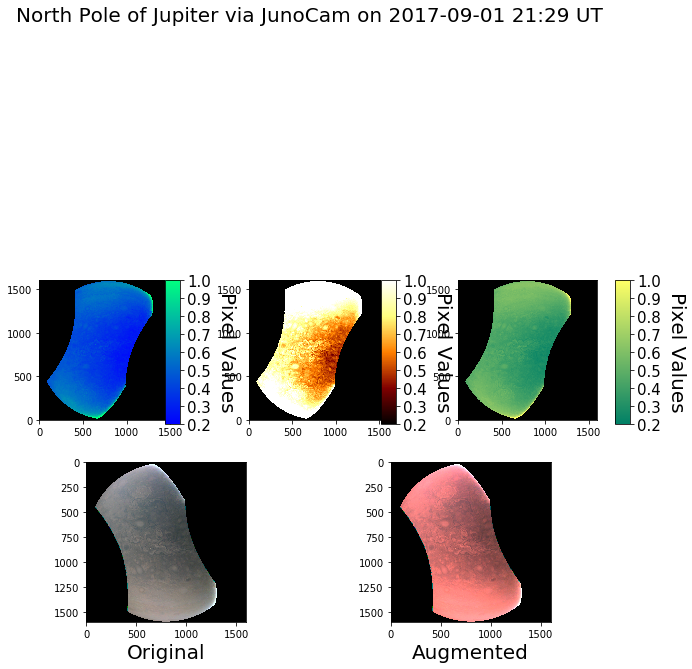

In [22]:
fig = plt.figure(figsize=(10, 10))

fig.suptitle('North Pole of Jupiter via JunoCam on 2017-09-01 21:29 UT', fontsize=20)

northMultiPlot = plt.GridSpec(2, 3, wspace=0.5)
bottomMultiPlot = plt.GridSpec(3,2)


augmentedBlueChart = fig.add_subplot(northMultiPlot[:,0]) #Partitioning the first row of the grid to the augmented blue chart
augmentedRedChart = fig.add_subplot(northMultiPlot[:,1]) #Partitioning the second row of the grid to the augmented red chart
augmentedGreenChart = fig.add_subplot(northMultiPlot[:,2]) #Partitioning the third row of the grid to the augmented green chart
nonAugmented = fig.add_subplot(bottomMultiPlot[2,0]) #Partitioning the fourth row of the grid to the non augmented mapprojected data
augmentedChart = fig.add_subplot(bottomMultiPlot[2,1]) #Partitioning the fifth row of the grid to the augmented mapprojected data

augmentedBlueChart.set_aspect(1) #making the charts square (orignally not square)
augmentedRedChart.set_aspect(1)
augmentedGreenChart.set_aspect(1)

augmentedRedChart = augmentedRedChart.pcolormesh(northPoleImageData['mapprojectedAugment'][:,:,0],   cmap = 'afmhot', vmin = 0.2, vmax = 1.0 )
augmentedRedChart.cmap.set_under('k')


augmentedGreenChart = augmentedGreenChart.pcolormesh(northPoleImageData['mapprojectedAugment'][:,:,1], cmap = 'summer', vmin = 0.2, vmax = 1.0)
augmentedGreenChart.cmap.set_under('k')

augmentedBlueChart = augmentedBlueChart.pcolormesh(northPoleImageData['mapprojectedAugment'][:,:,2],  cmap = 'winter', vmin = 0.2, vmax = 1.0)
augmentedBlueChart.cmap.set_under('k')


nonAugmented.imshow(northPoleImageData['mapprojected'])
nonAugmented.set_xlabel('Original',   fontsize = 20)   #Labeling the original


augmentedChart.imshow(northPoleImageData['mapprojectedAugment'])
augmentedChart.set_xlabel('Augmented', fontsize = 20)  #Labeling the augmented


############################################
## Color Bar Time! ##
############################# 
bluePosition = fig.add_axes([0.3, 0.4, 0.02, 0.2])   # Specifying the positions of the color bars.
redPosition = fig.add_axes([0.6, 0.4, 0.02, 0.2])    # Truly a process of trial and error to figure out what works best
greenPosition = fig.add_axes([0.925, 0.4, 0.02, 0.2])
############################# 


augmentedBlueColorBar = fig.colorbar(augmentedBlueChart, cax = bluePosition)
augmentedRedColorBar = fig.colorbar(augmentedRedChart, cax = redPosition)
augmentedGreenColorBar = fig.colorbar(augmentedGreenChart, cax = greenPosition)

augmentedBlueColorBar.set_label('Pixel Values', labelpad=25,
                     rotation=270, fontsize=20)

augmentedRedColorBar.set_label('Pixel Values', labelpad=25,
                     rotation=270, fontsize=20)

augmentedGreenColorBar.set_label('Pixel Values', labelpad=25,
                     rotation=270, fontsize=20)

augmentedBlueColorBar.ax.tick_params(labelsize=15)
augmentedRedColorBar.ax.tick_params(labelsize=15)
augmentedGreenColorBar.ax.tick_params(labelsize=15)


plt.show()


## Analysis

In this lab, I chose images of both the North and the South pole of Jupiter as captured from JunoCam. I thought it would be interesting to examine the poles and look for differences. For the first visualization, I created a multiplot object of the RGB values of the image of the Southern Polar region. For the augmentation of an image, I chose to increase the red values of the projected image of the North Pole of Jupiter. In doing so, it became evident to me that Jupiter has many clouds and a complex atmosphere. I chose to make a multiplot visualization with two rows of three columns. I did this so that all of the individual colors of the augmented image would be on the same row and so that the original and augmented images would lay side by side in their own row.
